> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: noshowappointments-kagglev2-may-2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

### Import important libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

### Explore that data

In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()### show the first 5 of data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape ### the have 14 Columns and 110527 Raws 

(110527, 14)

In [4]:
df.describe() 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()### show the null value , the don't have any missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(8), object(4)
memory usage: 11.8+ MB


In [5]:
df["ScheduledDay"]=pd.to_datetime(df["ScheduledDay"])

In [6]:
### show the value counts

In [7]:
df["PatientId"].value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
                ..
1.222828e+13     1
6.821231e+11     1
7.163981e+14     1
9.798964e+14     1
2.724571e+11     1
Name: PatientId, Length: 62299, dtype: int64

In [8]:
df["AppointmentID"].value_counts()

5769215    1
5731652    1
5707080    1
5702986    1
5715276    1
          ..
5586290    1
5584243    1
5598584    1
5602682    1
5771266    1
Name: AppointmentID, Length: 110527, dtype: int64

In [9]:
df["Gender"].value_counts() ### the have 2 gender female and man

F    71840
M    38687
Name: Gender, dtype: int64

In [10]:
df["ScheduledDay"].value_counts()

2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-04-05T15:35:20Z     1
2016-05-05T07:46:17Z     1
2016-04-25T17:27:05Z     1
2016-05-17T07:26:25Z     1
2016-06-08T10:39:03Z     1
Name: ScheduledDay, Length: 103549, dtype: int64

In [11]:
df["AppointmentDay"].value_counts()

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

In [12]:
df["Age"].value_counts()### the have wrong value '-1' and well be solve in clean

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [13]:
df["Neighbourhood"].value_counts() 

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [14]:
df["Scholarship"].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [15]:
df["Hipertension"].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [16]:
df["Diabetes"].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [17]:
df["Alcoholism"].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [18]:
df["Handcap"].value_counts() ### 0 it's no handcap ,1 it's one handcap ...

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [19]:
df["SMS_received"].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [20]:
df["No-show"].value_counts()### yes meen it's not going to the Appointment

No     88208
Yes    22319
Name: No-show, dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [21]:
dfAge =df[df['Age']< 0 ]### the have -1 age it's wrong and sloving now 
df =df.drop(dfAge.index, axis=0) ### the any age less than 0 well be dropped.

In [22]:
df["Age"].value_counts() ### now drop it.

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

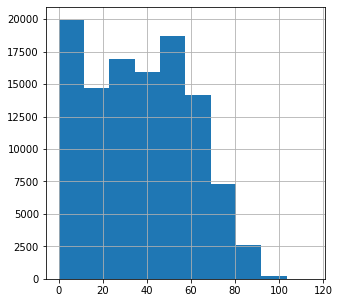

In [23]:
df['Age'].hist(figsize=(5,5)); ### Most ages requested for appointments between 0 to 70 and decreased at older ages

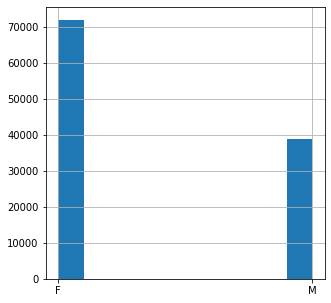

In [24]:
df['Gender'].hist(figsize=(5,5));### the female it's twice man

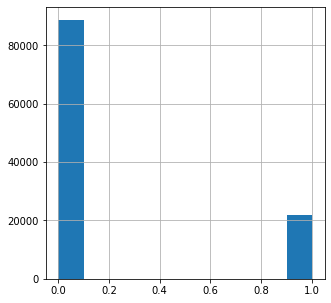

In [25]:
df['Hipertension'].hist(figsize=(5,5));### the people have the Hipertension Quarter fo total

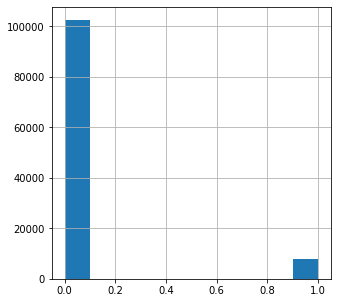

In [26]:
df['Diabetes'].hist(figsize=(5,5));### the people have the Diabetes it's less than 10% fo total

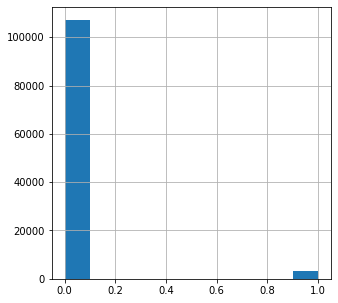

In [27]:
df['Alcoholism'].hist(figsize=(5,5));### the people  Alcoholism it's less than 3% fo total

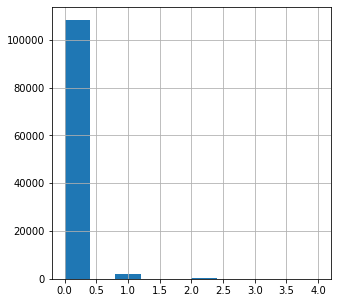

In [28]:
df['Handcap'].hist(figsize=(5,5)); ###the people  Handcap it's have 5 types 0,1,2,3,4 the 0 it's flod than other

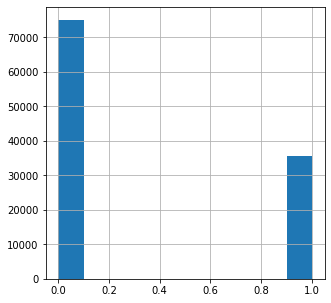

In [29]:
df['SMS_received'].hist(figsize=(5,5)); ### the send messages more the 70000 to the Patient

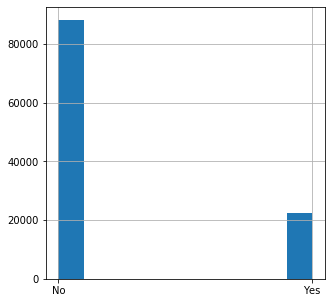

In [30]:
df['No-show'].hist(figsize=(5,5));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

###  Q1: What is the distribution of gender?

In [31]:
df['Gender'][:10]

0    F
1    M
2    F
3    F
4    F
5    F
6    F
7    F
8    F
9    F
Name: Gender, dtype: object

In [32]:
dfGender = df['Gender'].value_counts()

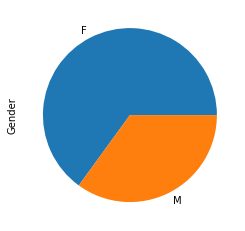

In [33]:
dfGender.plot(kind='pie') ### the female take 65% and man take 35%

### Q2: What are the ages that are recorded by appointments?

In [34]:
df['Age'][:10]

0    62
1    56
2    62
3     8
4    56
5    76
6    23
7    39
8    21
9    19
Name: Age, dtype: int64

In [35]:
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [36]:
dfAge = df['Age'].value_counts()

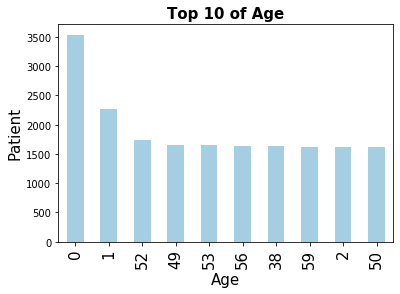

In [37]:
### the show the top 10 0f age use the plot 
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Patient' , fontsize=15)
ax.set_title('Top 10 of Age', fontsize=15, fontweight='bold')

dfAge[:10].plot(ax=ax, kind='bar', colormap='Paired')

### Q3: What is the mean average no-show and attendance percentage?


In [40]:
df["No-show"].replace("Yes",1,inplace=True) ### rename the value 'yes' to 1

In [41]:
df["No-show"].replace("No",0,inplace=True) ### rename the value 'no' to 0

In [44]:
np.mean(df['No-show']) the

0.20193438647919945

In [45]:
dfShow =df[df['No-show']==0] 
dfShow['No-show'].head()

0    0
1    0
2    0
3    0
4    0
Name: No-show, dtype: int64

In [46]:
dfNoShow =df[df['No-show']==1]
dfNoShow['No-show'].head()

6     1
7     1
11    1
17    1
20    1
Name: No-show, dtype: int64

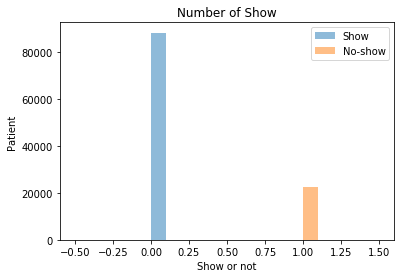

In [49]:
fig, ax = plt.subplots() ### the show No-shoe column use the plt

ax.hist(dfShow['No-show'],alpha=0.5,label='Show')
ax.hist(dfNoShow['No-show'],alpha=0.5,label='No-show')
ax.set_xlabel('Show or not')
ax.set_ylabel('Patient')
ax.set_title('Number of Show')
ax.legend(loc='upper right')
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!